In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile

In [11]:
try:
    df = pd.read_excel('/content/Online Retail.xlsx', engine='openpyxl')  # Explicitly use openpyxl engine
except zipfile.BadZipFile: # Now this exception can be caught correctly
    try:
        df = pd.read_excel('/content/Online Retail.xlsx', engine='xlrd')  # Try xlrd for older .xls files
    except Exception as e:
        print(f"Error reading file: {e}")
        # Handle the error, e.g., display a message to the user or use a default dataframe
        df = pd.DataFrame()  # Create an empty dataframe





## General Insights

In [12]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


Check unit price and quantity distribution, it seems quite odd!!

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
df.shape

(541909, 8)

## Data cleaning

In [14]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [15]:
# Function to print percentage of missing values per column
def mis_val(d):
    l=[]
    for x in d.isnull().sum().index:
        g=[]
        g.append(x)
        g.append(d[x].isnull().sum())
        per=(d[x].isnull().sum()/len(d))*100
        g.append(per)
        l.append(g)
    misd=pd.DataFrame(l)
    misd.columns=['Column','Missing Value','Percentage of Missing Value']
    misd.sort_values(by='Percentage of Missing Value',ascending=False,inplace=True)
    return misd

In [16]:
mis_val(df)

,Column,Missing Value,Percentage of Missing Value
6,CustomerID,135080,24.926694
2,Description,1454,0.268311
0,InvoiceNo,0,0.000000
1,StockCode,0,0.000000
3,Quantity,0,0.000000
4,InvoiceDate,0,0.000000
5,UnitPrice,0,0.000000
7,Country,0,0.000000


It is impossible to impute these many missing values in customer without significant alteration of information.
We will have to drop these entries.

In [17]:
df1=df.copy()

In [18]:
df1.dropna(subset=['CustomerID'],axis=0,inplace=True)

In [19]:
mis_val(df1)

,Column,Missing Value,Percentage of Missing Value
0,InvoiceNo,0,0.0
1,StockCode,0,0.0
2,Description,0,0.0
3,Quantity,0,0.0
4,InvoiceDate,0,0.0
5,UnitPrice,0,0.0
6,CustomerID,0,0.0
7,Country,0,0.0


It seems that null removal has occured for description column as well.

In [20]:
### Checking for Duplicates
df1.duplicated().sum()

5225

In [21]:
df1[df1.duplicated()==True].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom


In [22]:
df1.drop_duplicates(inplace=True)

In [23]:
df1.duplicated().sum()

0

## 2. Exploring the Data

### Countries

In [24]:
df1.Country.value_counts()

,count
Country,
United Kingdom,356728
Germany,9480
France,8475
EIRE,7475
Spain,2528
Netherlands,2371
Belgium,2069
Switzerland,1877
Portugal,1471


In [25]:
#Plotting our top 10 countries as percentage of total order
plt_countries=df1.Country.value_counts()[0:10]/len(df1)*100
plt_countries=pd.DataFrame(plt_countries)
plt_countries.columns=['Percent of total orders']
plt_countries

,Percent of total orders
Country,
United Kingdom,88.825809
Germany,2.360534
France,2.110288
EIRE,1.861286
Spain,0.629476
Netherlands,0.590383
Belgium,0.515184
Switzerland,0.467376
Portugal,0.366281


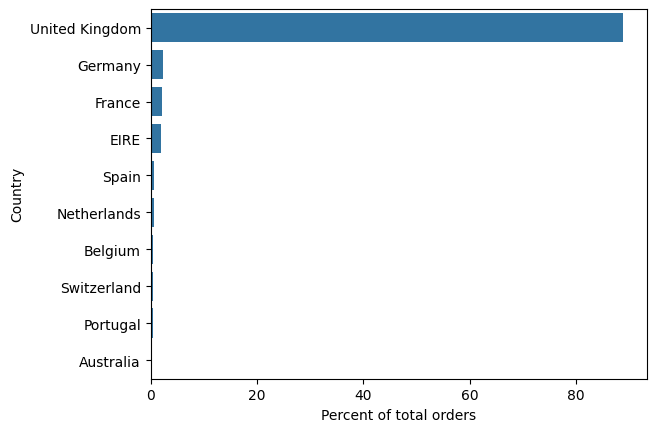

In [26]:
sns.barplot(data=plt_countries,y=plt_countries.index,x=plt_countries['Percent of total orders']);


It seems most of our orders(~90%) is in United Kingdom.

## Cohort Analysis

In [27]:
df3=df1.copy()
df3.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [28]:
df3.reset_index(inplace=True)
df3.drop('index',axis='columns',inplace=True)
df3.tail(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
401601,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
401602,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
401603,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [29]:
import datetime as dt

In [34]:
df3['InvoiceDate'][0].month

12

In [38]:
df3['InvoiceDate'][0].year

2010

In [40]:
x=dt.date(2010,12,12)
print(x)

2010-12-12


In [41]:
# This function takes datetime as input and returns year/month/1
def for_start(y):
    y1=y.month
    y2=y.year
    y3=dt.date(y2,y1,1)
    return y3

In [42]:
df3['InvoiceFormat']=df3['InvoiceDate'].apply(for_start)
df3.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceFormat
401599,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-01
401600,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-01
401601,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01
401602,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01
401603,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011-12-01


In [43]:
# First Transaction month (Cohort Month) for each customer
df3['Cohort Month']=df3.groupby('CustomerID')['InvoiceFormat'].transform(min)
df3.tail()

<ipython-input-43-4a087e7296be>:2: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  df3['Cohort Month']=df3.groupby('CustomerID')['InvoiceFormat'].transform(min)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceFormat,Cohort Month
401599,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-01,2011-08-01
401600,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-01,2011-08-01
401601,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01
401602,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01
401603,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011-12-01,2011-08-01


In [44]:
# This function calculates difference between invoice format and cohort month
def diff(d,x1,y1):
    l=[]
    for i in range(0,len(d)):
        xyear=d[x1][i].year
        xmonth=d[x1][i].month
        yyear=d[y1][i].year
        ymonth=d[y1][i].month
        diff=((xyear-yyear)*12)+(xmonth-ymonth)+1
        l.append(diff)
    return l

In [45]:
df3['Cohort Index']=diff(df3,'InvoiceFormat','Cohort Month')

In [46]:
df3.tail(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceFormat,Cohort Month,Cohort Index
401601,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01,5
401602,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01,5
401603,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011-12-01,2011-08-01,5


In [47]:
df4=df3[['CustomerID','Cohort Month','Cohort Index']]
df4.head(3)

,CustomerID,Cohort Month,Cohort Index
0,17850.0,2010-12-01,1
1,17850.0,2010-12-01,1
2,17850.0,2010-12-01,1


In [48]:
df5=df4.groupby(['Cohort Month','Cohort Index'])['CustomerID'].apply(pd.Series.nunique).reset_index()
df5.head()

,Cohort Month,Cohort Index,CustomerID
0,2010-12-01,1,948
1,2010-12-01,2,362
2,2010-12-01,3,317
3,2010-12-01,4,367
4,2010-12-01,5,341


In [49]:
pivot_table = df5.pivot(index='Cohort Month', columns=['Cohort Index'],values='CustomerID')
pivot_table

Cohort Index,1,2,3,4,5,6,7,8,9,10,11,12,13
Cohort Month,,,,,,,,,,,,,
2010-12-01,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02-01,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03-01,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04-01,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05-01,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


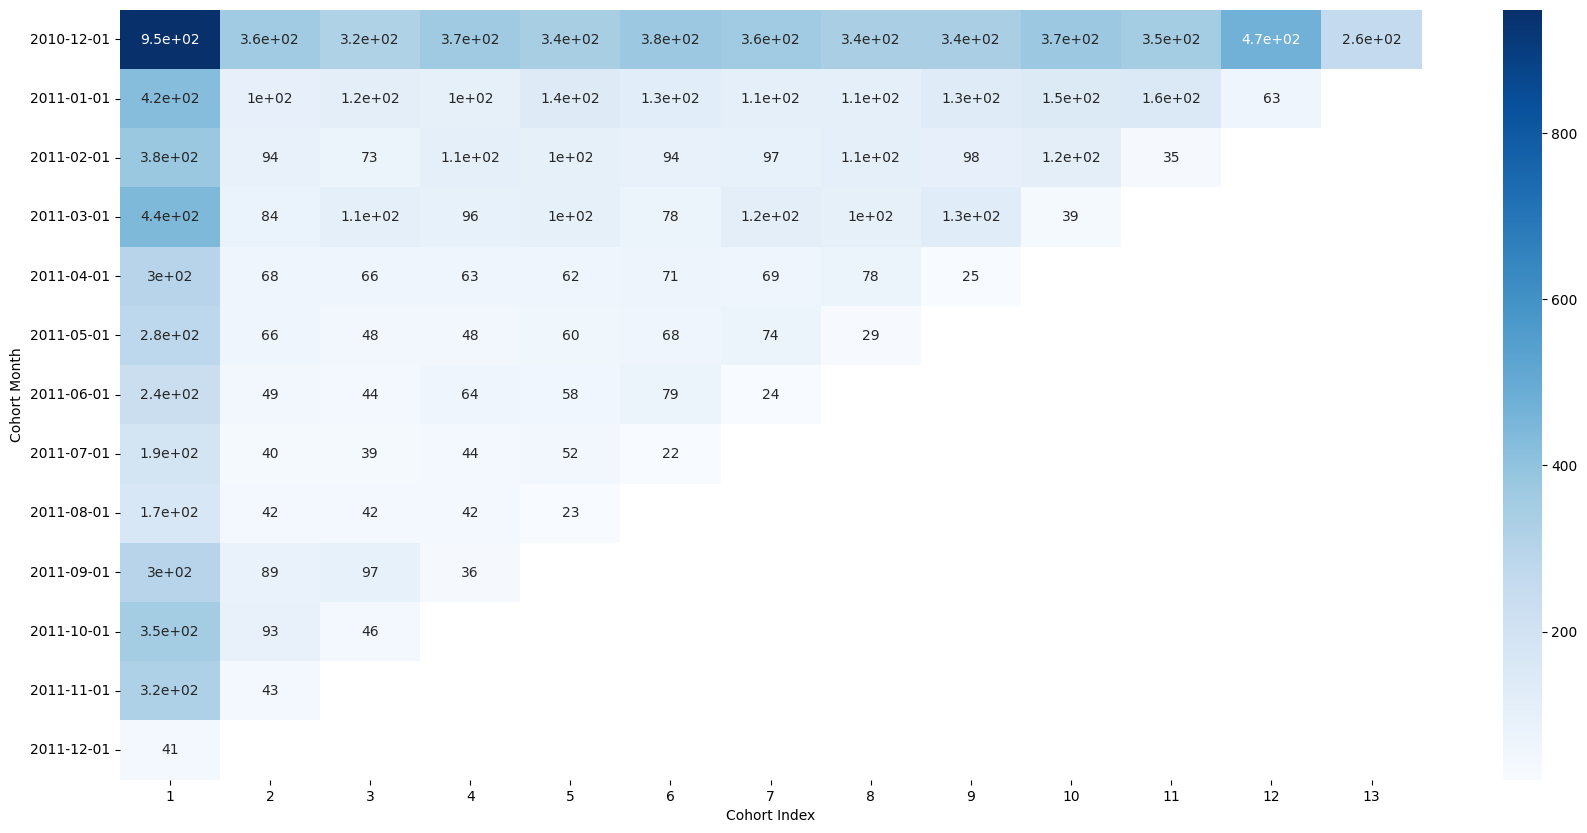

In [50]:
plt.figure(figsize=(21,10))
sns.heatmap(pivot_table,annot=True,cmap='Blues');

In [51]:
#cohort table for percentage
new_cohort_table = pivot_table.divide(pivot_table.iloc[:,0],axis=0)
new_cohort_table

Cohort Index,1,2,3,4,5,6,7,8,9,10,11,12,13
Cohort Month,,,,,,,,,,,,,
2010-12-01,1.0,0.381857,0.334388,0.387131,0.359705,0.396624,0.379747,0.354430,0.354430,0.394515,0.373418,0.500000,0.274262
2011-01-01,1.0,0.239905,0.282660,0.242280,0.327791,0.299287,0.261283,0.256532,0.311164,0.346793,0.368171,0.149644,NaN
2011-02-01,1.0,0.247368,0.192105,0.278947,0.268421,0.247368,0.255263,0.281579,0.257895,0.313158,0.092105,NaN,NaN
2011-03-01,1.0,0.190909,0.254545,0.218182,0.231818,0.177273,0.263636,0.238636,0.288636,0.088636,NaN,NaN,NaN
2011-04-01,1.0,0.227425,0.220736,0.210702,0.207358,0.237458,0.230769,0.260870,0.083612,NaN,NaN,NaN,NaN
2011-05-01,1.0,0.236559,0.172043,0.172043,0.215054,0.243728,0.265233,0.103943,NaN,NaN,NaN,NaN,NaN
2011-06-01,1.0,0.208511,0.187234,0.272340,0.246809,0.336170,0.102128,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,1.0,0.209424,0.204188,0.230366,0.272251,0.115183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,1.0,0.251497,0.251497,0.251497,0.137725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


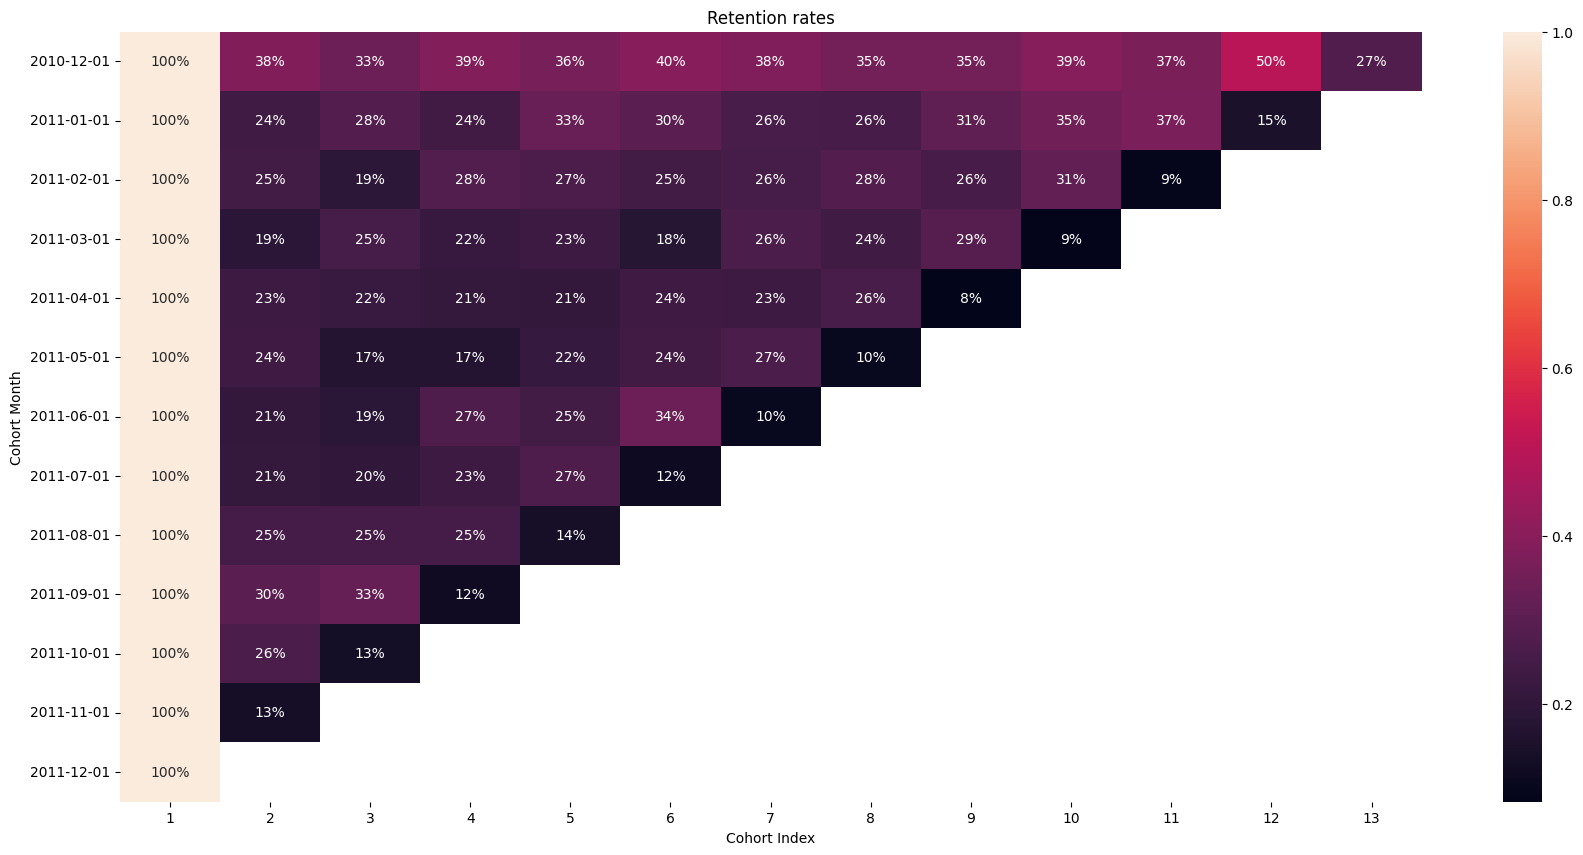

In [52]:
plt.figure(figsize=(21,10))
sns.heatmap(new_cohort_table,annot=True,fmt='.0%')
plt.title('Retention rates');

In [53]:
df6=df1.copy()
df6=df6[(df6.UnitPrice*df6.Quantity)>0]
df6.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Recency

In [54]:
# Start and end dates:
print('Start date: {}'.format(df6.InvoiceDate.min()))
print('End date: {}'.format(df6.InvoiceDate.max()))

Start date: 2010-12-01 08:26:00
End date: 2011-12-09 12:50:00


We will take snapshot date as the start of new year 2012-01-01

In [55]:
day="2012-01-01"
day=pd.to_datetime(day)

In [56]:
recency=df6.groupby(["CustomerID"]).agg({"InvoiceDate":lambda x:((day-x.max()).days)})
recency.head(10)

,InvoiceDate
CustomerID,
12346.0,347
12347.0,24
12348.0,97
12349.0,40
12350.0,332
12352.0,58
12353.0,226
12354.0,254
12355.0,236


### Frequency

In [57]:
freq=df6.groupby(["CustomerID"])[["InvoiceNo"]].count()
freq.head(5)

,InvoiceNo
CustomerID,
12346.0,1
12347.0,182
12348.0,31
12349.0,73
12350.0,17


### Monetary

In [58]:
df6["total"]=df6["Quantity"]*df6["UnitPrice"]
money=df6.groupby(["CustomerID"])[["total"]].sum()
money

,total
CustomerID,
12346.0,77183.60
12347.0,4310.00
12348.0,1797.24
12349.0,1757.55
12350.0,334.40
...,...
18280.0,180.60
18281.0,80.82
18282.0,178.05


In [59]:
recency.columns=["Recency"]
freq.columns=["Frequency"]
money.columns=["Monetary"]

In [60]:
RFM=pd.concat([recency,freq,money], axis=1)
RFM

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,347,1,77183.60
12347.0,24,182,4310.00
12348.0,97,31,1797.24
12349.0,40,73,1757.55
12350.0,332,17,334.40
...,...,...,...
18280.0,299,10,180.60
18281.0,202,7,80.82
18282.0,29,12,178.05


In [61]:
RFM.describe()

,Recency,Frequency,Monetary
count,4338.000000,4338.000000,4338.000000
mean,114.059474,90.523744,2048.688081
std,100.012264,225.506968,8985.230220
min,22.000000,1.000000,3.750000
25%,39.000000,17.000000,306.482500
50%,72.000000,41.000000,668.570000
75%,163.750000,98.000000,1660.597500
max,395.000000,7676.000000,280206.020000


## Clustering

### Checking Skewness

<ipython-input-62-09421bde6f6b>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3, 1, 1); sns.distplot(RFM['Recency'],bins=50)
<ipython-input-62-09421bde6f6b>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3, 1, 2); sns.distplot(RFM['Frequency'],bins=100)
<ipython-input-62-09421bde6f6b>:11: Use

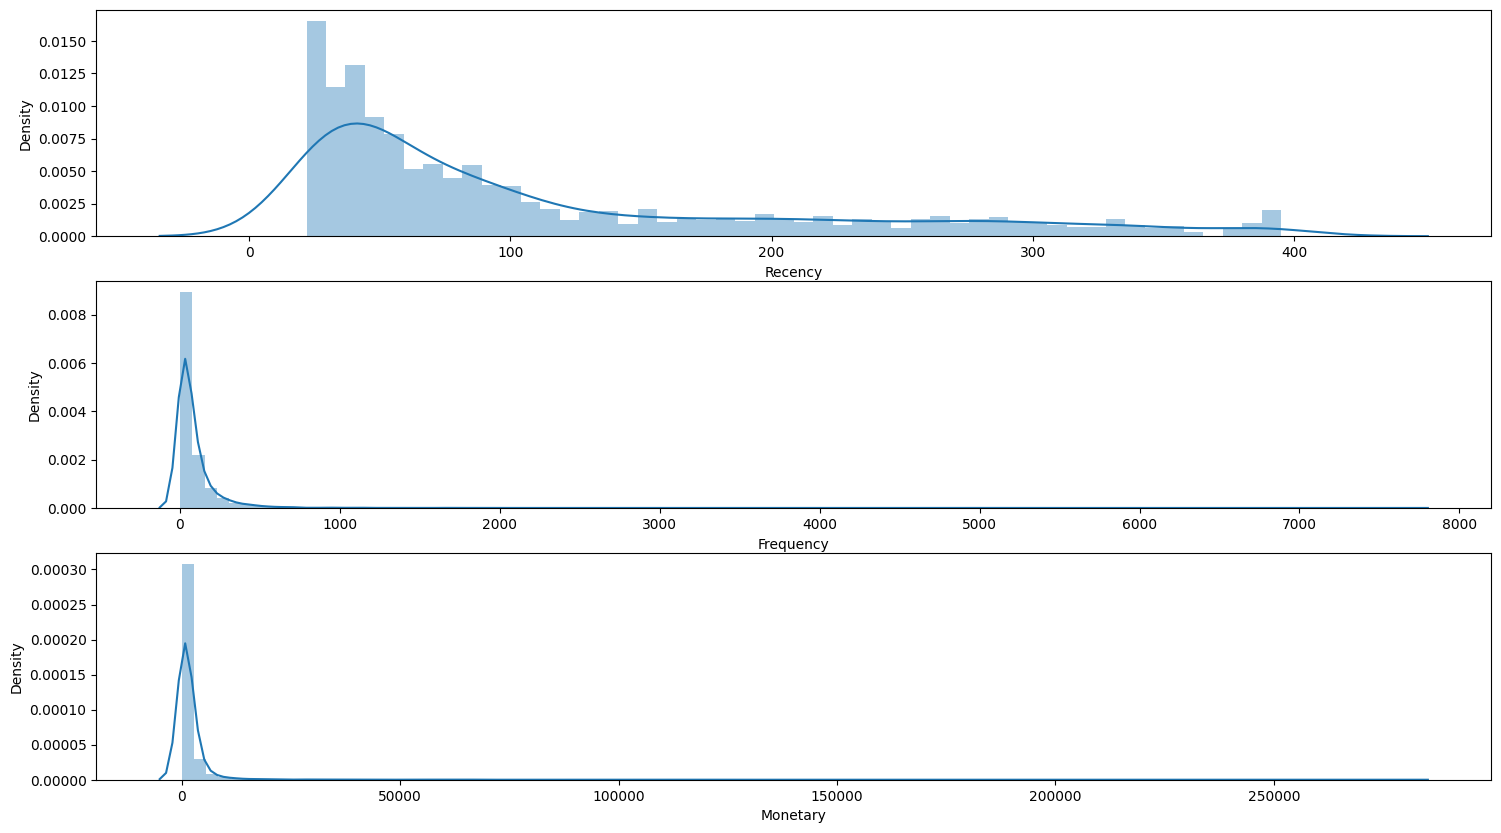

In [62]:
# Checking the distribution of Recency, Frequency and MonetaryValue variables.
plt.figure(figsize=(18,10))

# Plot distribution of var1
plt.subplot(3, 1, 1); sns.distplot(RFM['Recency'],bins=50)

# Plot distribution of var2
plt.subplot(3, 1, 2); sns.distplot(RFM['Frequency'],bins=100)

# Plot distribution of var3
plt.subplot(3, 1, 3); sns.distplot(RFM['Monetary'],bins=100)

plt.show()

Data seems to be left skewed. Log transformation can be helpful

In [63]:
from sklearn.preprocessing import StandardScaler
# Unskew the data
data_log = np.log(RFM)

# Initialize a standard scaler and fit it
scaler = StandardScaler()
scaler.fit(data_log)

# Scale and center the data
data_normalized = scaler.transform(data_log)
scaled=data_normalized

# Create a pandas DataFrame
data_norm = pd.DataFrame(data=data_normalized, index=RFM.index, columns=RFM.columns)

<ipython-input-64-f95b4b8c41f3>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3, 1, 1); sns.distplot(data_norm['Recency'])
<ipython-input-64-f95b4b8c41f3>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3, 1, 2); sns.distplot(data_norm['Frequency'])
<ipython-input-64-f95b4b8c41f3>:10: UserWarn

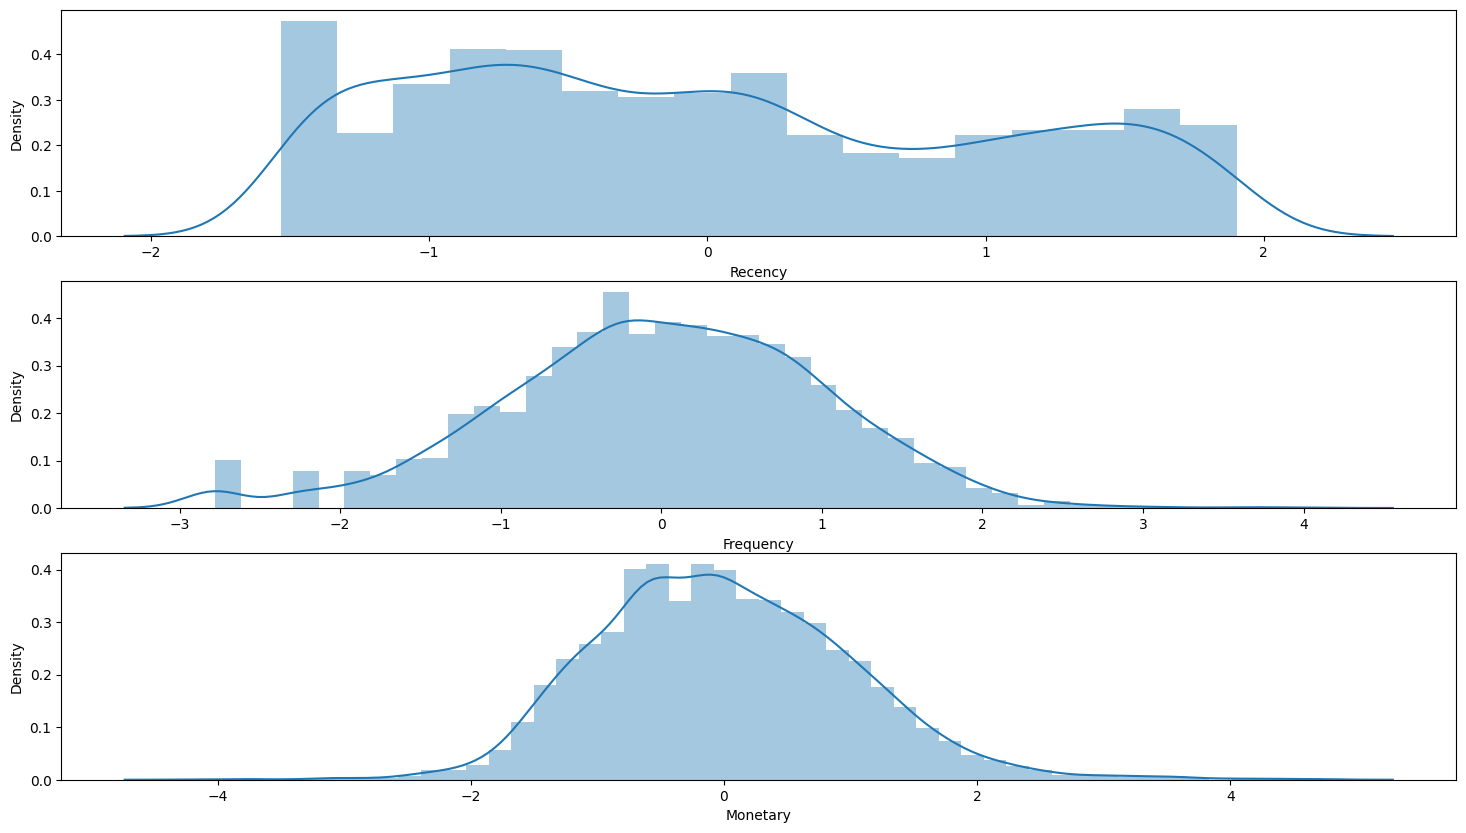

In [64]:
plt.figure(figsize=(18,10))

# Plot recency distribution
plt.subplot(3, 1, 1); sns.distplot(data_norm['Recency'])

# Plot frequency distribution
plt.subplot(3, 1, 2); sns.distplot(data_norm['Frequency'])

# Plot monetary value distribution
plt.subplot(3, 1, 3); sns.distplot(data_norm['Monetary'])

# Show the plot
plt.show()

Skewness has been removed

# Implementing K means

In [65]:
from sklearn.cluster import KMeans

In [66]:
inertia=[]

for i in np.arange(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(scaled)
    inertia.append(kmeans.inertia_)

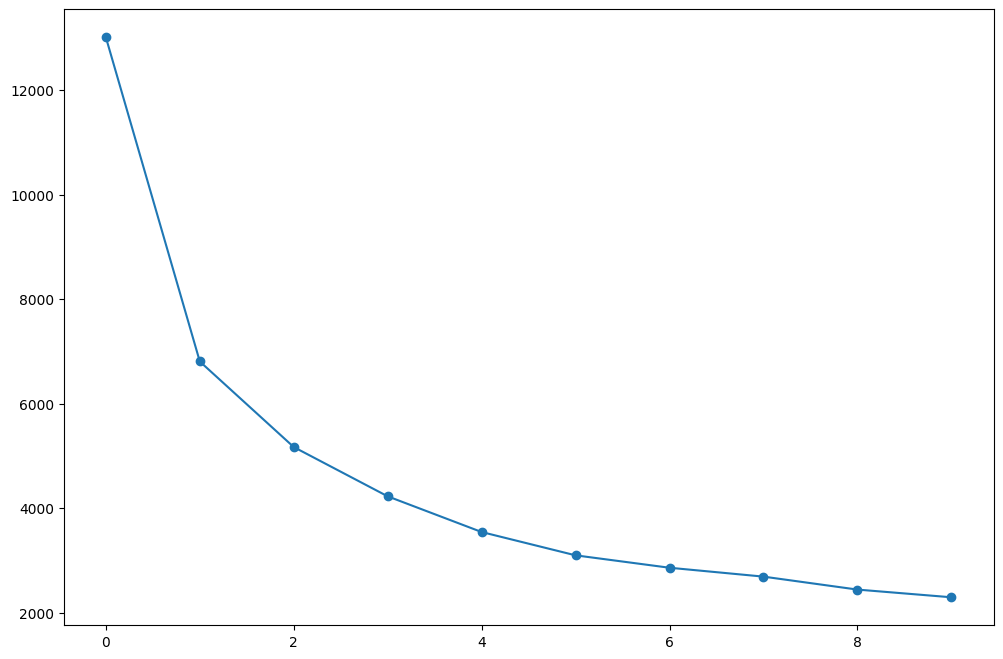

In [67]:
plt.figure(figsize=(12,8))
plt.plot(inertia, marker="o");

Elbow seems to be at n=3

In [68]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(scaled)
RFM["Clusters"]=(kmeans.labels_+1)

In [69]:
RFM

,Recency,Frequency,Monetary,Clusters
CustomerID,,,,
12346.0,347,1,77183.60,1
12347.0,24,182,4310.00,3
12348.0,97,31,1797.24,2
12349.0,40,73,1757.55,3
12350.0,332,17,334.40,1
...,...,...,...,...
18280.0,299,10,180.60,1
18281.0,202,7,80.82,1
18282.0,29,12,178.05,2


In [72]:
final=RFM.groupby("Clusters")[["Recency","Frequency","Monetary"]].mean() # Changing tuple to list
final

,Recency,Frequency,Monetary
Clusters,,,
1,233.941311,18.893293,405.032896
2,71.200799,43.617228,738.855022
3,49.523959,228.941870,5546.420174


In [73]:
final=RFM.groupby("Clusters")[["Recency","Frequency","Monetary"]].mean() # Changing tuple to list
final

,Recency,Frequency,Monetary
Clusters,,,
1,233.941311,18.893293,405.032896
2,71.200799,43.617228,738.855022
3,49.523959,228.941870,5546.420174


In [74]:
def func(row):
    if row["Clusters"]==1:
        return 'Major Customers'
    elif row["Clusters"]==2:
        return 'At Risk'
    else:
        return 'Average Standing Customers'

In [75]:
RFM['group']=RFM.apply(func, axis=1)
RFM

,Recency,Frequency,Monetary,Clusters,group
CustomerID,,,,,
12346.0,347,1,77183.60,1,Major Customers
12347.0,24,182,4310.00,3,Average Standing Customers
12348.0,97,31,1797.24,2,At Risk
12349.0,40,73,1757.55,3,Average Standing Customers
12350.0,332,17,334.40,1,Major Customers
...,...,...,...,...,...
18280.0,299,10,180.60,1,Major Customers
18281.0,202,7,80.82,1,Major Customers
18282.0,29,12,178.05,2,At Risk


In [76]:
result=RFM.group.value_counts()
result

,count
group,
At Risk,1753
Major Customers,1312
Average Standing Customers,1273


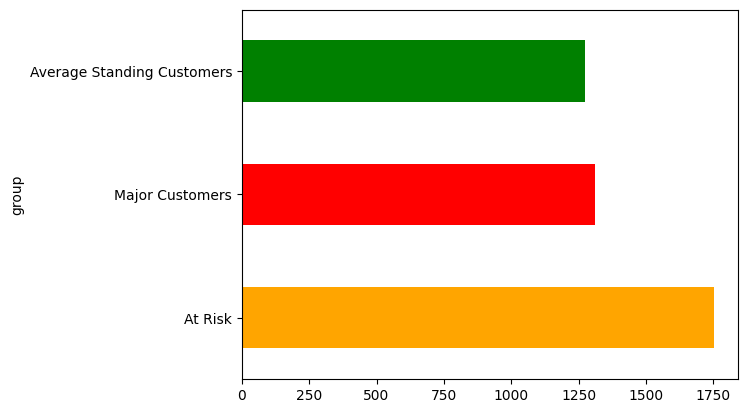

In [77]:
result.plot(kind="barh", color=["Orange","Red","Green"]);

We see that majority of the customers are average, meaning they bring appreciable money and transact regularly

Rest of the customers are equally split between at risk(churn) category and major ones (those bringing maximum money)

In [78]:
population_avg = RFM[['Recency','Frequency','Monetary']].mean()
population_avg

,0
Recency,114.059474
Frequency,90.523744
Monetary,2048.688081


In [79]:
## Cluster Average

In [80]:
cluster_average=RFM.groupby('Clusters')[['Recency','Frequency','Monetary']].mean()
cluster_average

,Recency,Frequency,Monetary
Clusters,,,
1,233.941311,18.893293,405.032896
2,71.200799,43.617228,738.855022
3,49.523959,228.941870,5546.420174


In [81]:
relative_imp = cluster_average.divide(population_avg,axis=1)
relative_imp.round(2)

,Recency,Frequency,Monetary
Clusters,,,
1,2.05,0.21,0.20
2,0.62,0.48,0.36
3,0.43,2.53,2.71


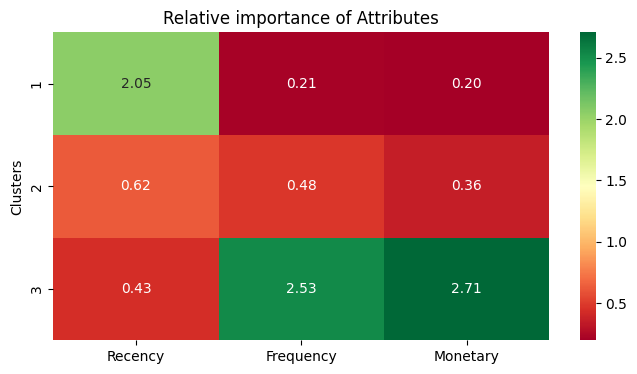

In [82]:
# Plot heatmap
plt.figure(figsize=(8, 4))
plt.title('Relative importance of Attributes')
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()

## Final Thoughts:

To understand what these 3 clusters mean in a business scenario, let us label the clusters as ‘At Risk Customers’, ‘Average Standing customers’, and ‘Best customers’.

Below is the RFM interpretation of each segment and the points that a company is recommended to keep in mind while designing the marketing strategy for that segment of customers:

1.  **<span style="color: red;">At Risk Customers</span>** : These Customers have transacted a long time ago and contribute least in monetary  terms.

- **<span style="color: magenta;">Suggestion</span>** : These customers may have already exited from customer base. Try to understand why they left. Some sale and discount offers might help to bring a portion back.

2. **<span style="color: Blue;">Average Standing customers</span>**: These Customers have transacted a recently and regularly, and contribute appreciably in monetary terms.

- **<span style="color: magenta;">Suggestion</span>** : Need to handle them with  care and convert them to best customers. Discount and Sale are highly desirable. Provide top customer support and services.

3. **<span style="color: Green;">Best customers</span>** : These customer transacted recently, are incredibly frequent and bring massive money to the company.

- **<span style="color: magenta;">Suggestion</span>** : These customers can be a target of newly launched product. Repeated advertising can further increase revenue. Heavy discounts are not required.